In [226]:
import numpy as np
import matplotlib.pyplot as plt
import random


transition_matrix = [[1/2, 1/4, 1/4],
                     [1/4, 1/8, 5/8],
                      [1/3, 2/3, 0]]
probability_vector = [1/4, 0, 3/4]
encoding = ['A', 'B', 'C'] # A maps to 0, B maps to 1, C maps to 2

def nSidedDie(p):
    choices = [(i + 1) for i in range(len(p))]
    choice = np.random.choice(choices,p = p)
    return choice

In [227]:
def markov_chain(steps, probability_vector, encoding):
    states = [nSidedDie(probability_vector) - 1]
    for i in range(steps - 1):
        # access the current node and decide 
        # which other place to make
        if encoding[states[-1]] == 'A':
            states.append(nSidedDie(transition_matrix[0]) - 1) # use the the transition vector corresponding to the state
        elif encoding[states[-1]] == 'B':
            states.append(nSidedDie(transition_matrix[1]) - 1)
        else:
            states.append(nSidedDie(transition_matrix[2]) - 1)
    return states
            

In [228]:
def decode_states(states):
    return [encoding[state] for state in states]

In [231]:
def print_markov_chain(transition_matrix, probability_vector, encoding):
    plt.title('Sample simulation run of a three-state markov chain')
    plt.xlabel('step number')
    plt.ylabel('state')
    states = markov_chain(15, probability_vector, encoding)
    x = range(len(states))
    plt.plot(x, states, color = 'blue', linestyle = 'dashed', marker = 'o', markerfacecolor = 'red', markersize = 8)
    plt.xticks(np.arange(0, 15, 1))
    plt.yticks(np.arange(0, 3,1))
    plt.show()
    plt.close()
    
    simulated_markov_chain = [markov_chain(15, probability_vector, encoding) for _ in range(10000)]
    
    state_a_count = []
    state_b_count = []
    state_c_count = []
    
    simulation_mark_chain_prime = np.transpose(simulated_markov_chain)
    
    for simulation in simulation_mark_chain_prime:
        state_a_count.append(list(simulation).count(0)/ 10000)
        state_b_count.append(list(simulation).count(1) / 10000)
        state_c_count.append(list(simulation).count(2) / 10000)
    plt.title('Simulated three-state Markov Chain')
    plt.xlabel('step number')
    plt.ylabel('probability')
    x = range(15)
    plt.plot(x, state_a_count, color = 'blue', linestyle = 'dashed', marker = 'o', markerfacecolor = 'blue', markersize = 8, label = 'state A')
    plt.plot(x, state_b_count, color = 'red', linestyle = 'dashed', marker = 'o', markerfacecolor = 'red', markersize = 8, label = 'state B')
    plt.plot(x, state_c_count, color = 'orange', linestyle= 'dashed', marker = 'o', markerfacecolor = 'orange', markersize= 8, label ='state C')
    plt.yticks(np.arange(0, 1.1, .1))
    plt.legend(loc = 'upper right')
    plt.show()
    plt.close()
    
    
    state_a_probability = []
    state_b_probability = []
    state_c_probability = []
    for iteration in range(15):
        state_a_probability.append(probability_vector[0])
        state_b_probability.append(probability_vector[1])
        state_c_probability.append(probability_vector[2])
        probability_vector = np.dot(probability_vector, transition_matrix)
    plt.title('Calculated three-state Markov Chain')
    plt.xlabel('step number')
    plt.ylabel('probability')
    x = range(15)
    plt.plot(x, state_a_probability, color = 'blue', linestyle = 'dashed', marker = 'o', markerfacecolor = 'blue', markersize = 8, label = 'state A')
    plt.plot(x, state_b_probability, color = 'red', linestyle = 'dashed', marker = 'o', markerfacecolor = 'red', markersize = 8, label = 'state B')
    plt.plot(x, state_c_probability, color = 'orange', linestyle= 'dashed', marker = 'o', markerfacecolor = 'orange', markersize= 8, label ='state C')
    plt.yticks(np.arange(0, 1.1, .1))
    plt.legend(loc = 'upper right')
    plt.show()
    plt.close()
    


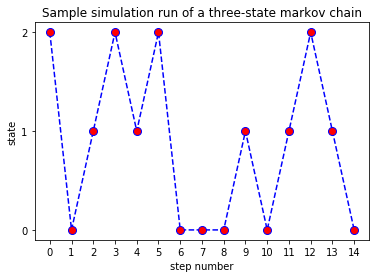

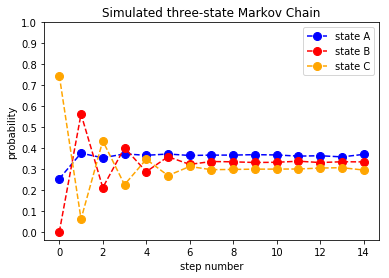

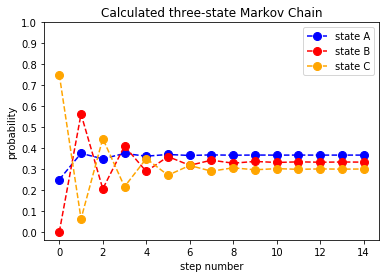

In [232]:
print_markov_chain(transition_matrix, probability_vector, encoding)

In [237]:
transition_matrix = [[0, 1, 0, 0, 0],
                    [1/2, 0, 1/2, 0, 0],
                    [1/3, 1/3, 0, 0, 1/3],
                    [1, 0, 0, 0, 0],
                    [0, 1/3, 1/3, 1/3, 0]]
v = [1/5, 1/5, 1/5, 1/5, 1/5]
def google_rank(transition_matrix, v):
    v_copy = v
    a_states = []
    b_states = []
    c_states = []
    d_states = []
    e_states = []
    for iteration in range(20):
        a_states.append(v_copy[0])
        b_states.append(v_copy[1])
        c_states.append(v_copy[2])
        d_states.append(v_copy[3])
        e_states.append(v_copy[4])
        v_copy = np.dot(v_copy, transition_matrix)

    order_list = []
    for (x, y) in zip(['A','B','C','D','E'], v_copy):
        order_list.append((x, y))
    order_list.sort(key=lambda x : -x[1])
    print(order_list)
    x = range(20)
    plt.title('Calculated five-state Markov Chain')
    plt.xlabel('step number')
    plt.ylabel('probability')
    plt.plot(x, a_states, color = 'blue', linestyle = 'dashed', marker = 'o', markerfacecolor = 'blue', markersize = 8, label = 'page A')
    plt.plot(x, b_states, color = 'red', linestyle = 'dashed', marker = 'o', markerfacecolor = 'red', markersize = 8, label = 'page B')
    plt.plot(x, c_states, color = 'orange', linestyle= 'dashed', marker = 'o', markerfacecolor = 'orange', markersize= 8, label ='page C')
    plt.plot(x, d_states, color = 'pink', linestyle= 'dashed', marker = 'o', markerfacecolor = 'pink', markersize= 8, label ='page D')
    plt.plot(x, e_states, color = 'green', linestyle= 'dashed', marker = 'o', markerfacecolor = 'green', markersize= 8, label ='page E')
    plt.xticks(np.arange(0, 20, 1))
    plt.legend(loc = 'upper right')
    plt.show()
    plt.close()


[('B', 0.39030646718246836), ('A', 0.29266053889289478), ('C', 0.21945675040856924), ('E', 0.073193112178962572), ('D', 0.02438313133710442)]


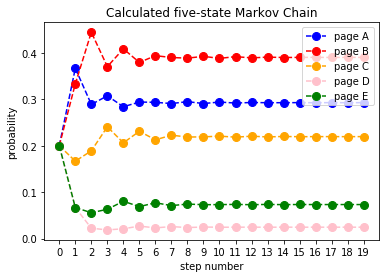

In [238]:
google_rank(transition_matrix, v)

[('B', 0.38940980880495218), ('A', 0.29312200057289972), ('C', 0.22004640893983968), ('E', 0.073018880023304866), ('D', 0.024402901659003374)]


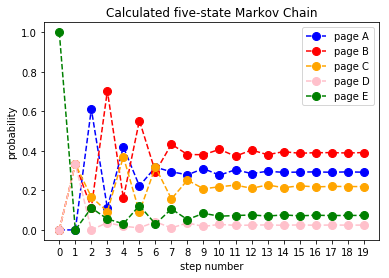

In [239]:
v2 = [0, 0, 0, 0, 1]
google_rank(transition_matrix, v2)

In [240]:
def markov_chain(steps, probability_vector, encoding, transition_matrix):
    states = [nSidedDie(probability_vector) - 1]
    for i in range(steps - 1):
        # access the current node and decide 
        # which other place to make
        if encoding[states[-1]] == 'A':
            states.append(nSidedDie(transition_matrix[0]) - 1) # use the the transition vector corresponding to the state
        elif encoding[states[-1]] == 'B':
            states.append(nSidedDie(transition_matrix[1]) - 1)
        elif encoding[states[-1]] == 'C':
            states.append(nSidedDie(transition_matrix[2]) - 1)
        elif encoding[states[-1]] == 'D':
            states.append(nSidedDie(transition_matrix[3]) - 1)
        else:
            states.append(nSidedDie(transition_matrix[4]) - 1)
    return states

In [241]:
def plot_drunkard_walk(states):
    x = range(len(states))
    plt.title('A simulation of a 5-state markov chain')
    plt.ylabel('State')
    plt.xlabel('Step number')
    plt.plot(x, states, color = 'blue', linestyle = 'dashed', marker = 'o', markerfacecolor = 'red', markersize = 8)
    plt.xticks(np.arange(0, 15, 1))
    plt.yticks(np.arange(0, 5, 1))
    plt.show()
    plt.close()


In [242]:
def get_absorbing_matrix(steps, probability_vector,encoding, transition_matrix, target):
    value = markov_chain(steps, probability_vector, encoding, transition_matrix)
    while value[-1] != target:
        value = markov_chain(steps, probability_vector, encoding, transition_matrix)
    return value

probability_vector = [1, 0, 0, 0, 0]
transition_matrix = [[1, 0, 0, 0, 0],
                    [0.3, 0, 0.7, 0, 0],
                    [0, 0.5, 0, 0.5, 0],
                    [0, 0, 0.6, 0, 0.4],
                    [0, 0, 0, 0, 1]]
encoding = ['A', 'B', 'C', 'D', 'E']
probability_vector = [0, 1/3, 1/3, 1/3, 0]


In [243]:
state0 = get_absorbing_matrix(15, [0, 0.2, 0.5, 0.3, 0], ['A','B','C','D','E'], transition_matrix, 0)

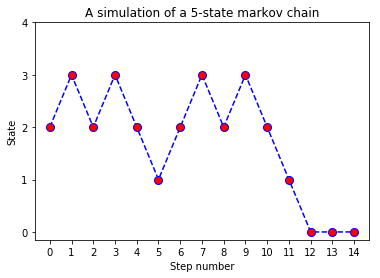

In [244]:
probability_vector = [1, 0, 0, 0, 0]
transition_matrix = [[1, 0, 0, 0, 0],
                    [0.3, 0, 0.7, 0, 0],
                    [0, 0.5, 0, 0.5, 0],
                    [0, 0, 0.6, 0, 0.4],
                    [0, 0, 0, 0, 1]]
encoding = ['A', 'B', 'C', 'D', 'E']
probability_vector = [0, 1/3, 1/3, 1/3, 0]
plot_drunkard_walk(state0)

In [245]:
state1 = get_absorbing_matrix(15, [0, 0.2, 0.5, 0.3, 0], ['A','B','C','D','E'], transition_matrix, 4)

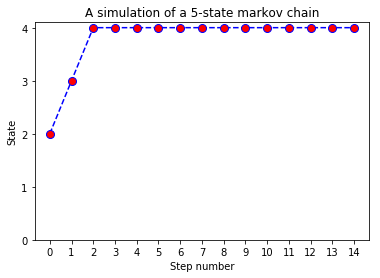

In [246]:
plot_drunkard_walk(state1)

In [262]:
probability_vector = [0, 0, 1, 0, 0]


In [263]:
simulated_markov_chain = [markov_chain(15, probability_vector, encoding, transition_matrix) for iteration in range(10000)]
count0 = 0
count4 = 0
for simulation in simulated_markov_chain:
    if simulation[-1] == 0:
        count0 = count0 + 1
    elif simulation[-1] == 4:
        count4 = count4 + 1
print(count0 / 10000)
print(count4 / 10000)

0.4111
0.5388
